  모델링 순서
    1) 데이타셋 생성
    2) 시퀀스 모델 생성
    3) compile
    4) fit()
    5) predict()
    6) evaluate()



In [2]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras


# 1. DataLoader
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train[200])
print(y_train[200])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29 197 255  84   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253  83   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253 251   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253 16

모델에 데이타 입력하기 전에
1) 255로 나누고 / 2)한줄로 데이타를 펼쳐서 입력

In [3]:
print(X_train.shape)
# L, H, W=X_train.shape

# # 1) 1차원으로 들리는 과정
# X_train = X_train.reshape(-1, H * W)
# X_test = X_test.reshape(-1, H * W)

# print(X_train.shape)
# print(X_test.shape)

# # 2) 255로 나눈다
# X_train = X_train/255
# X_test = X_test/255

# # print(X_train[0])

# # 3) y값 전처리하기...One Hot Encoding
# Y_train=np_utils.to_categorical(y_train) #앞 문자를 대문자로 바꿨다..전처리 했다.
# Y_test = np_utils.to_categorical(y_test)

# print(Y_train[0])



(60000, 28, 28)


하이퍼파라미터 지정한후 모델 생성

In [ ]:
input = 28*28
unit = 100
numClasses = 10
epochs = 10
bSize = 100

# 모델생성
model = models.Sequential()
model.add(layers.Dense(unit, activation='relu',input_shape=(input,)))
model.add(layers.Dense(numClasses,activation='softmax'))

# compile
model.compile("sgd", "categorical_crossentropy","accuracy")

# fit
model.fit(X_train, Y_train,epochs = 10, batch_size = bSize, validation_split = 0.2)

Epoch 1/10
480/480 [==============================] - 15s 3ms/step - loss: 1.6359 - accuracy: 0.5287 - val_loss: 0.6434 - val_accuracy: 0.8568
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.6175 - accuracy: 0.8503 - val_loss: 0.4522 - val_accuracy: 0.8856
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.8777 - val_loss: 0.3871 - val_accuracy: 0.8976
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8863 - val_loss: 0.3539 - val_accuracy: 0.9036
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8955 - val_loss: 0.3321 - val_accuracy: 0.9098
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.9029 - val_loss: 0.3162 - val_accuracy: 0.9123
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.9058 - val_loss: 0.3037 - val_accuracy: 0.9157
Epoch

In [ ]:
# Evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size=bSize)
print('Loss:{}, Accuracy:{}'.format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.9218
Loss:0.27687686681747437, Accuracy:0.9218000173568726


# 시각화

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

# fit...학습할때 나오는 로그메세지들을 다 모아서 리턴한다...history
history=model.fit(X_train, Y_train,epochs = 50, batch_size = bSize, validation_split = 0.2)

Epoch 1/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2868 - accuracy: 0.9193 - val_loss: 0.2686 - val_accuracy: 0.9253
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.9223 - val_loss: 0.2621 - val_accuracy: 0.9268
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2710 - accuracy: 0.9245 - val_loss: 0.2563 - val_accuracy: 0.9277
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9265 - val_loss: 0.2498 - val_accuracy: 0.9306
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2570 - accuracy: 0.9288 - val_loss: 0.2455 - val_accuracy: 0.9309
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2507 - accuracy: 0.9307 - val_loss: 0.2395 - val_accuracy: 0.9336
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9319 - val_loss: 0.2346 - val_accuracy: 0.9349
Epoch 

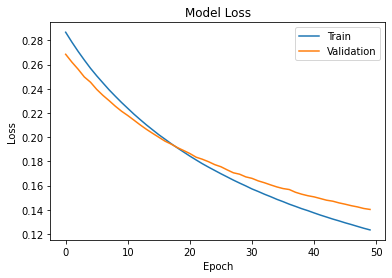

In [ ]:
plot_loss(history)


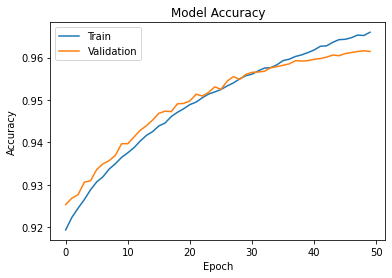

In [ ]:
plot_acc(history)